In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [190]:
df= pd.read_csv("pandas worksheet\\healthcare-dataset-stroke-data.csv")

In [191]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [193]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [194]:
df.fillna(df['bmi'].mean(),inplace= True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [196]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='gender', ylabel='count'>

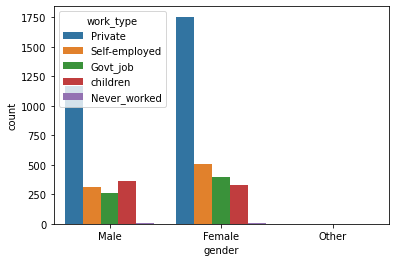

In [197]:
sns.countplot(x='gender',data=df,hue='work_type')

<AxesSubplot:xlabel='age', ylabel='Count'>

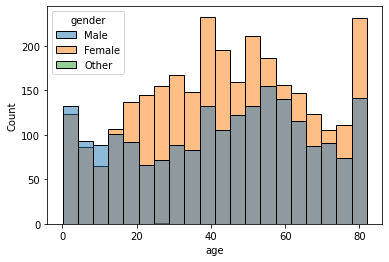

In [198]:
sns.histplot(x='age',data=df,hue='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

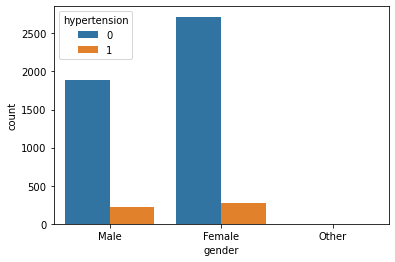

In [199]:
sns.countplot(x='gender',data=df,hue='hypertension')

In [200]:
from sklearn.preprocessing import LabelEncoder

In [201]:
encoder= LabelEncoder()

In [202]:
encoder.fit(df['work_type'])

LabelEncoder()

In [203]:
df['encoded_work']=encoder.transform(df['work_type'])

In [204]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,encoded_work
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,3


In [205]:
married=pd.get_dummies(df["ever_married"],drop_first=True)
married

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
5105,1
5106,1
5107,1
5108,1


In [206]:
ressidence=pd.get_dummies(df["Residence_type"],drop_first=True)
ressidence

,Urban
0,1
1,0
2,0
3,1
4,0
...,...
5105,1
5106,1
5107,0
5108,0


In [207]:
dummy_gender=pd.get_dummies(df["gender"])
dummy_gender

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [208]:
smoking=pd.get_dummies(df["smoking_status"],drop_first=True)
smoking

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
5105,0,1,0
5106,0,1,0
5107,0,1,0
5108,1,0,0


In [209]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,encoded_work
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,3


In [211]:
df.drop(['id','gender','smoking_status','work_type','ever_married','Residence_type'],axis=1,inplace=True)

In [212]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,encoded_work
0,67.0,0,1,228.69,36.600000,1,2
1,61.0,0,0,202.21,28.893237,1,3
2,80.0,0,1,105.92,32.500000,1,2
3,49.0,0,0,171.23,34.400000,1,2
4,79.0,1,0,174.12,24.000000,1,3


In [213]:
df=pd.concat([df,dummy_gender,married,smoking,ressidence],axis=1)

In [214]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,encoded_work,Female,Male,Other,Yes,formerly smoked,never smoked,smokes,Urban
0,67.0,0,1,228.69,36.600000,1,2,0,1,0,1,1,0,0,1
1,61.0,0,0,202.21,28.893237,1,3,1,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.500000,1,2,0,1,0,1,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,2,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.000000,1,3,1,0,0,1,0,1,0,0


In [215]:
x=df.drop(['stroke'],axis=1)
y=df['stroke']

In [216]:
x.shape

(5110, 14)

# LOGISTIC REGRESSION

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
lr=LogisticRegression()

In [221]:
lr.fit(x_train,y_train)

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
predictions=lr.predict(x_test)

In [224]:
from sklearn.metrics import classification_report

In [225]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1597
           1       0.00      0.00      0.00        90

    accuracy                           0.95      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.90      0.95      0.92      1687



C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
from sklearn.model_selection import cross_val_score

In [228]:
cross_val_score(estimator=LogisticRegression(), X = x, y = y, cv = 5, scoring='accuracy')

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([0.95107632, 0.95107632, 0.95107632, 0.95009785, 0.95205479])

In [230]:
cross_val_score(estimator=LogisticRegression(), 
                X = x, y = y, 
                cv = 5, scoring='accuracy').mean()

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9510763209393346

# LINEAR REGRESSION

In [232]:
 from sklearn.linear_model import LinearRegression

In [233]:
lr=LinearRegression()

In [234]:
lr.fit(x_train,y_train)

LinearRegression()

In [235]:
x.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'encoded_work', 'Female', 'Male', 'Other', 'Yes', 'formerly smoked',
       'never smoked', 'smokes', 'Urban'],
      dtype='object')

In [236]:
lr.coef_

array([ 2.71047632e-03,  4.56797545e-02,  4.61638055e-02,  3.39672804e-04,
       -6.15315694e-04,  1.07446061e-02,  1.04206697e-03, -1.04206697e-03,
        1.59594560e-16, -4.65883638e-02,  4.02700922e-03, -5.60071663e-03,
       -4.50687416e-03,  7.59242789e-03])

In [237]:
predictions=lr.predict(x_test)

In [238]:
from sklearn import metrics

In [239]:
metrics.mean_absolute_error(y_test,predictions)

0.0964127749876404

In [240]:
metrics.mean_squared_error(y_test,predictions)

0.04703036969901611

In [241]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.21686486506351393

In [242]:
x_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,encoded_work,Female,Male,Other,Yes,formerly smoked,never smoked,smokes,Urban
2772,58.0,0,0,59.68,29.2,3,1,0,0,1,1,0,0,0
842,23.0,0,0,79.13,32.9,2,1,0,0,0,1,0,0,0
625,40.0,0,0,71.20,27.1,2,1,0,0,1,0,1,0,1
2119,42.0,0,0,68.24,33.1,2,0,1,0,1,1,0,0,1
3188,35.0,0,0,104.40,24.4,2,1,0,0,1,0,1,0,0


# KNN

In [243]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,encoded_work,Female,Male,Other,Yes,formerly smoked,never smoked,smokes,Urban
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,-0.361642,0.027924,-0.027623,-0.010659,0.679125,0.236897,0.119307,0.073133,0.014180
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,-0.051761,-0.021143,0.021275,-0.004597,0.164243,0.058853,0.065063,0.031240,-0.007913
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,-0.028023,-0.085617,0.085717,-0.003343,0.114644,0.066804,-0.021856,0.044049,0.003092
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,-0.050513,-0.054902,0.054580,0.011489,0.155068,0.068111,0.023885,0.017646,-0.004946
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,-0.299448,0.025797,-0.025464,-0.011802,0.335705,0.104257,0.106220,0.085579,-0.000120
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,-0.032316,-0.009027,0.009117,-0.003166,0.108340,0.064556,-0.004129,0.008939,0.015458
encoded_work,-0.361642,-0.051761,-0.028023,-0.050513,-0.299448,-0.032316,1.000000,-0.056532,0.056597,-0.002152,-0.352722,-0.085587,-0.169630,-0.121376,-0.007316
Female,0.027924,-0.021143,-0.085617,-0.054902,0.025797,-0.009027,-0.056532,1.000000,-0.999597,-0.016642,0.030483,-0.043603,0.099111,-0.011306,0.006340
Male,-0.027623,0.021275,0.085717,0.054580,-0.025464,0.009117,0.056597,-0.999597,1.000000,-0.011757,-0.029936,0.042738,-0.098813,0.011477,-0.005937
Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.002152,-0.016642,-0.011757,1.000000,-0.019327,0.030568,-0.010728,-0.005978,-0.014217


<AxesSubplot:>

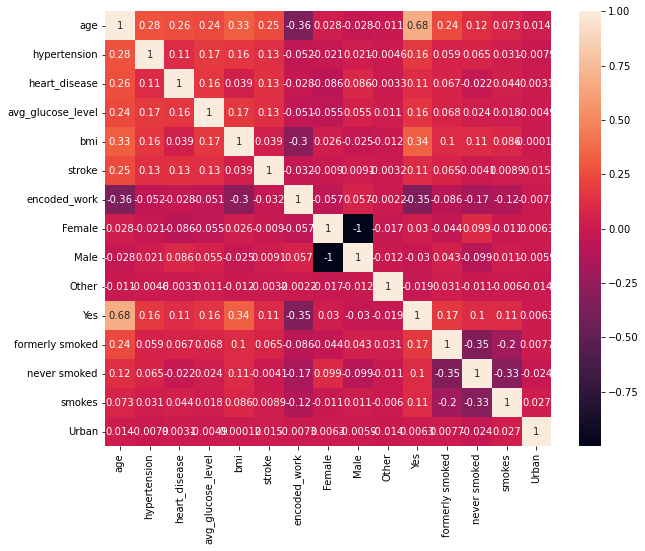

In [246]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [247]:
df.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
Yes                  0.108340
formerly smoked      0.064556
bmi                  0.038947
Urban                0.015458
Male                 0.009117
smokes               0.008939
Other               -0.003166
never smoked        -0.004129
Female              -0.009027
encoded_work        -0.032316
Name: stroke, dtype: float64

In [250]:
x=df.drop(['stroke'],axis=1)
y=df['stroke']

In [251]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
knn=KNeighborsClassifier(7)

In [253]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [254]:
predictions=knn.predict(x_test)

In [255]:
from sklearn.metrics import classification_report

In [256]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1597
           1       0.00      0.00      0.00        90

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.90      0.94      0.92      1687



In [257]:
from sklearn.model_selection import cross_val_score

In [258]:
ks = list(range(1, 100, 2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [260]:
scores = []

for k in ks:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, x, y, cv = 5, scoring = 'accuracy').mean()
    scores.append(score)
    print(f"Accuracy with {k} neighbours: {score}")


Accuracy with 1 neighbours: 0.9180039138943247
Accuracy with 3 neighbours: 0.9383561643835616
Accuracy with 5 neighbours: 0.9424657534246575
Accuracy with 7 neighbours: 0.947358121330724
Accuracy with 9 neighbours: 0.9487279843444227
Accuracy with 11 neighbours: 0.9500978473581213
Accuracy with 13 neighbours: 0.9504892367906066
Accuracy with 15 neighbours: 0.9506849315068493
Accuracy with 17 neighbours: 0.9506849315068493
Accuracy with 19 neighbours: 0.950880626223092
Accuracy with 21 neighbours: 0.9510763209393346
Accuracy with 23 neighbours: 0.9510763209393346
Accuracy with 25 neighbours: 0.9512720156555773
Accuracy with 27 neighbours: 0.9512720156555773
Accuracy with 29 neighbours: 0.9512720156555773
Accuracy with 31 neighbours: 0.9512720156555773
Accuracy with 33 neighbours: 0.9512720156555773
Accuracy with 35 neighbours: 0.9512720156555773
Accuracy with 37 neighbours: 0.9512720156555773
Accuracy with 39 neighbours: 0.9512720156555773
Accuracy with 41 neighbours: 0.9512720156555773

# SVM

In [261]:
from sklearn.svm import SVC

In [262]:
svc=SVC()

In [264]:
svc.fit(x_train,y_train)

SVC()

In [265]:
predictions=svc.predict(x_test)

In [266]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [267]:
from sklearn.metrics import classification_report

In [268]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1597
           1       0.00      0.00      0.00        90

    accuracy                           0.95      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.90      0.95      0.92      1687



C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.0001, 0.001],
    'kernel':['rbf']
}

In [271]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)

In [273]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.4s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.0001, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [275]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [277]:
grid_predictions = grid.predict(x_test)

In [278]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1597
           1       0.00      0.00      0.00        90

    accuracy                           0.95      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.90      0.95      0.92      1687



C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,encoded_work,Female,Male,Other,Yes,formerly smoked,never smoked,smokes,Urban
0,67.0,0,1,228.69,36.600000,1,2,0,1,0,1,1,0,0,1
1,61.0,0,0,202.21,28.893237,1,3,1,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.500000,1,2,0,1,0,1,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,2,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.000000,1,3,1,0,0,1,0,1,0,0
